In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\psagv\\Downloads\\Sales.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

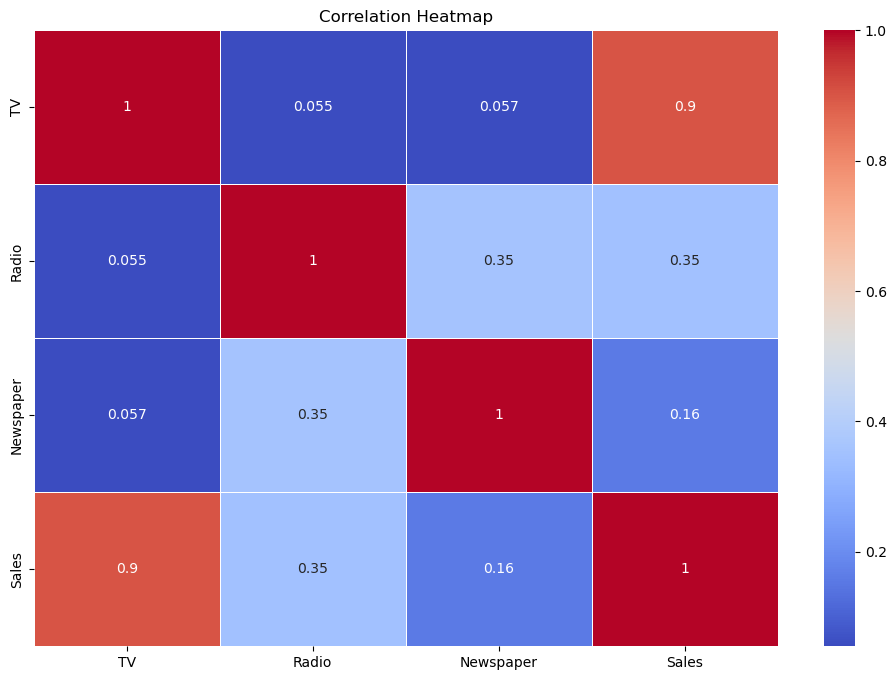

In [6]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

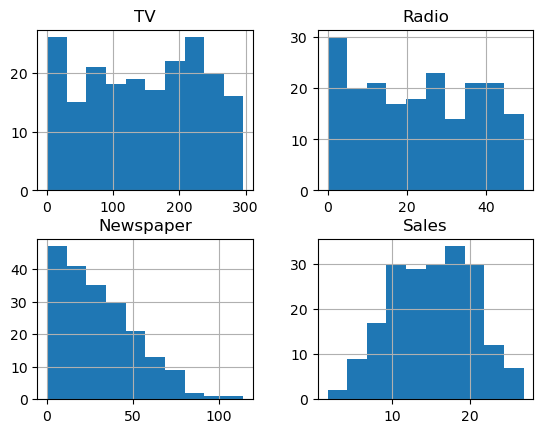

In [7]:
#Plot histograph.
df.hist()

In [8]:
#Asign Varibale for model
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [9]:
#Import required library to train your model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,random_state = 0)

In [10]:
#Check train data size
x_train.shape

(150, 3)

In [11]:
#Check test data size.
x_test.shape

(50, 3)

In [12]:
# Check OLS regression report.
import statsmodels.api as sm

# Adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     503.9
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           8.69e-77
Time:                        14:45:22   Log-Likelihood:                -275.36
No. Observations:                 150   AIC:                             558.7
Df Residuals:                     146   BIC:                             570.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7286      0.336     14.072      0.000       4.065       5.393
TV             0.0535      0.002     35.563      0.000       0.050       0.056
Radio          0.1104      0.009     12.423      0.000       0.093       0.128
Newspaper  -4.371e-05      0.007     -0.007      0.995      -0.013       0.013
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                1.006
Skew:                           0.182   Prob(JB):                        0.605
Kurtosis:                       2.833   Cond. No.                         479.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Import libraries for Linear Regression. 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [14]:
regressor.fit(x_train,y_train)

LinearRegression()

In [15]:
print(regressor.coef_)

[ 5.34530806e-02  1.10417563e-01 -4.37125135e-05]


In [16]:
print(regressor.intercept_)

4.728630893324768


In [17]:
predicted = regressor.predict(x_test)

In [18]:
print(x_test)

        TV  Radio  Newspaper
18    69.2   20.5       18.3
170   50.0   11.6       18.4
107   90.4    0.3       23.2
98   289.7   42.3       51.2
177  170.2    7.8       35.2
182   56.2    5.7       29.7
5      8.7   48.9       75.0
146  240.1    7.3        8.7
12    23.8   35.1       65.9
152  197.6   23.3       14.2
61   261.3   42.7       54.7
125   87.2   11.8       25.9
180  156.6    2.6        8.3
154  187.8   21.1        9.5
80    76.4   26.7       22.3
7    120.2   19.6       11.6
33   265.6   20.0        0.3
130    0.7   39.6        8.7
37    74.7   49.4       45.7
74   213.4   24.6       13.1
183  287.6   43.0       71.8
145  140.3    1.9        9.0
45   175.1   22.5       31.5
159  131.7   18.4       34.6
60    53.5    2.0       21.4
123  123.1   34.6       12.4
179  165.6   10.0       17.6
185  205.0   45.1       19.6
122  224.0    2.4       15.6
44    25.1   25.7       43.3
16    67.8   36.6      114.0
55   198.9   49.4       60.0
150  280.7   13.9       37.0
111  241.7   3

In [19]:
dframe = pd.DataFrame(y_test,predicted)

In [20]:
dfr = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted, 'res':(y_test-predicted)})

In [21]:
print(dfr)

     Actual Price  Predicted Price       res
18           11.3        10.690344  0.609656
170           8.4         8.681324 -0.281324
107          12.0         9.592901  2.407099
98           25.4        24.882413  0.517587
177          16.7        14.686064  2.013936
182           8.7         8.360776  0.339224
5             7.2        10.589813 -3.389813
146          18.2        18.368383 -0.168383
12            9.2         9.873590 -0.673590
152          16.6        17.863068 -1.263068
61           24.2        23.408360  0.791640
125          10.6        10.691535 -0.091535
180          15.5        13.386106  2.113894
154          20.6        17.096515  3.503485
80           11.8        11.759620  0.040380
7            13.2        13.317368 -0.117368
33           17.4        21.134107 -3.734107
130           1.6         9.138203 -7.538203
37           14.7        14.174206  0.525794
74           17.0        18.851218 -1.851218
183          26.2        24.846554  1.353446
145       

In [22]:
#Import library for accuracy check.
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
#Check accuracy of model.
regressor.score(x_test,y_test)

0.8718069474344206

In [72]:
graph=dfr.head(10)

<Axes: >

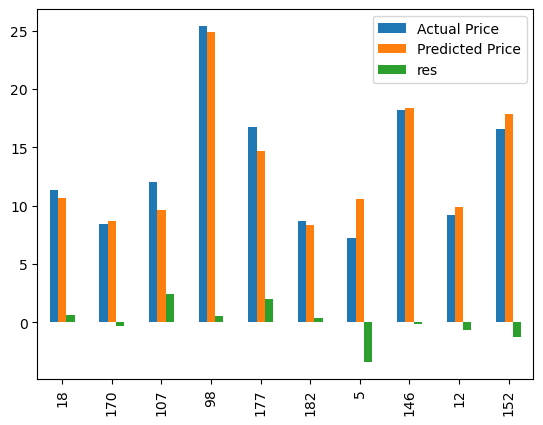

In [74]:
#Visualize data
graph.plot(kind='bar')

C:\Users\psagv\AppData\Local\Temp\ipykernel_42204\445387719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


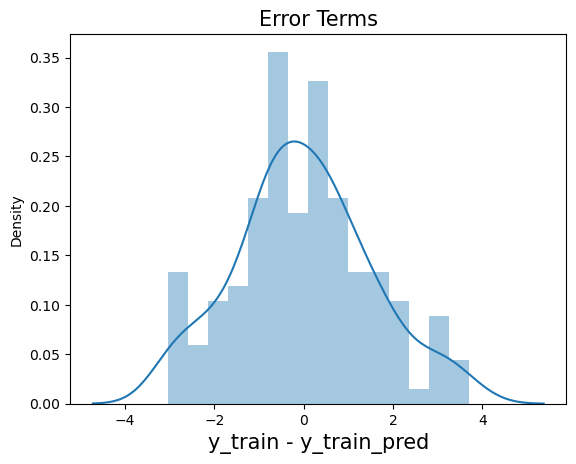

In [76]:
#To perform residual analysis

#Predicting y_value using training data of X
y_train_pred = lr.predict(x_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()